## Importing libraries and dataset

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [95]:
df = pd.read_excel('/content/Data_Train.xlsx')

In [96]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [97]:
df_test = pd.read_excel('/content/Data_Test.xlsx')

In [98]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


## Dropping Restaurant ID

In [99]:
df.drop(['RESTAURANT_ID'],axis=1,inplace=True)
df_test.drop(['RESTAURANT_ID'],axis=1,inplace=True)

## Feature Engineering for columns

In [100]:
df['CUISINES'] = df['CUISINES'].apply(lambda x: [cuisine.strip() for cuisine in x.split(',')])
df_test['CUISINES'] = df_test['CUISINES'].apply(lambda x: [cuisine.strip() for cuisine in x.split(',')])

In [101]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"[North Indian, Burger, Kebab]","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","[Goan, Continental]","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"[Finger Food, Continental, Asian, Chinese]",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"[North Indian, South Indian, Chinese, Street F...",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [102]:
dic = {}
for i in df['CUISINES']:
  for j in i:
    if j in dic:
      dic[j] += 1
    else:
      dic[j] = 1

In [103]:
len(dic.keys())

125

Since there are 158 unique cusines it won't be logical to go for one-hot encoding as it would create an extremely sparse dataset.

Even Ordinal encoding doesn't seem to be a good choice as it will have 158 different values and the model will think one cuisine is better than the other which is something we do not want the model to think.

A better approach could be to replace every cuisine by it's frequency and add those values together. This could introduce a fact that the more common cuisines a restaurant has the higher is it's cuisine value. Let us see how this works out !

In [104]:
sorted_dict = dict(sorted(dic.items(), key=lambda item: item[1], reverse = True))

In [105]:
sorted_dict

{'North Indian': 5383,
 'Chinese': 4368,
 'South Indian': 2274,
 'Fast Food': 2121,
 'Continental': 1563,
 'Biryani': 1260,
 'Desserts': 1146,
 'Italian': 1145,
 'Beverages': 967,
 'Cafe': 830,
 'Mughlai': 761,
 'Street Food': 663,
 'Bakery': 655,
 'Seafood': 588,
 'Kerala': 515,
 'Pizza': 512,
 'Asian': 441,
 'Arabian': 396,
 'Momos': 383,
 'Burger': 364,
 'Ice Cream': 357,
 'Thai': 320,
 'American': 302,
 'Finger Food': 277,
 'European': 259,
 'Andhra': 256,
 'Mexican': 254,
 'Rolls': 250,
 'Salad': 250,
 'Sandwich': 247,
 'Juices': 235,
 'Kebab': 233,
 'Healthy Food': 219,
 'Mithai': 189,
 'BBQ': 175,
 'Lebanese': 155,
 'Mediterranean': 153,
 'Hyderabadi': 140,
 'Japanese': 139,
 'Chettinad': 134,
 '': 93,
 'Bengali': 84,
 'Maharashtrian': 80,
 'Modern Indian': 69,
 'Mangalorean': 64,
 'Tea': 59,
 'Sushi': 55,
 'Malwani': 53,
 'Tibetan': 51,
 'Rajasthani': 51,
 'Coffee': 43,
 'Gujarati': 43,
 'Steak': 43,
 'Malaysian': 41,
 'Indian': 38,
 'Korean': 36,
 'Bar Food': 34,
 'Goan': 33,


Now you might be wondering why would we do the below steps.

Reason - The Cuisines that are not in train set might be present in the test set hence assigning them a value of 0 would be logical in this case as the model will not be considering these values as it has never seen them.

In [106]:
dic_test = sorted_dict.copy()

In [107]:
for i in df_test['CUISINES']:
  for j in i:
    if j not in sorted_dict:
      dic_test[j] = 0

In [108]:
dic_test[''] = 0

In [109]:
dic_test

{'North Indian': 5383,
 'Chinese': 4368,
 'South Indian': 2274,
 'Fast Food': 2121,
 'Continental': 1563,
 'Biryani': 1260,
 'Desserts': 1146,
 'Italian': 1145,
 'Beverages': 967,
 'Cafe': 830,
 'Mughlai': 761,
 'Street Food': 663,
 'Bakery': 655,
 'Seafood': 588,
 'Kerala': 515,
 'Pizza': 512,
 'Asian': 441,
 'Arabian': 396,
 'Momos': 383,
 'Burger': 364,
 'Ice Cream': 357,
 'Thai': 320,
 'American': 302,
 'Finger Food': 277,
 'European': 259,
 'Andhra': 256,
 'Mexican': 254,
 'Rolls': 250,
 'Salad': 250,
 'Sandwich': 247,
 'Juices': 235,
 'Kebab': 233,
 'Healthy Food': 219,
 'Mithai': 189,
 'BBQ': 175,
 'Lebanese': 155,
 'Mediterranean': 153,
 'Hyderabadi': 140,
 'Japanese': 139,
 'Chettinad': 134,
 '': 0,
 'Bengali': 84,
 'Maharashtrian': 80,
 'Modern Indian': 69,
 'Mangalorean': 64,
 'Tea': 59,
 'Sushi': 55,
 'Malwani': 53,
 'Tibetan': 51,
 'Rajasthani': 51,
 'Coffee': 43,
 'Gujarati': 43,
 'Steak': 43,
 'Malaysian': 41,
 'Indian': 38,
 'Korean': 36,
 'Bar Food': 34,
 'Goan': 33,
 

In [110]:
df['CUISINES_FREQ'] = df['CUISINES'].apply(lambda cuisines: [dic_test[cuisine] for cuisine in cuisines])

df_test['CUISINES_FREQ'] = df_test['CUISINES'].apply(lambda cuisines: [dic_test[cuisine] for cuisine in cuisines])

In [111]:
df['CUISINES_FREQ']= df['CUISINES_FREQ'].apply(lambda x: sum(x))
df_test['CUISINES_FREQ'] = df_test['CUISINES_FREQ'].apply(lambda x: sum(x))

In [112]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CUISINES_FREQ
0,CASUAL DINING,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,5469
1,"CASUAL DINING,BAR","[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,649
2,CASUAL DINING,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,11151
3,QUICK BITES,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,4419
4,DESSERT PARLOR,[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,1146
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"[North Indian, Burger, Kebab]","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,5980
12686,"CASUAL DINING,BAR","[Goan, Continental]","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,1596
12687,LOUNGE,"[Finger Food, Continental, Asian, Chinese]",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,6649
12688,CASUAL DINING,"[North Indian, South Indian, Chinese, Street F...",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,12688


Title

In [113]:
df['TITLE'] = df['TITLE'].astype(str).apply(lambda x: [title.strip() for title in x.split(',')])
df_test['TITLE'] = df_test['TITLE'].astype(str).apply(lambda x: [title.strip() for title in x.split(',')])

In [114]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CUISINES_FREQ
0,[CASUAL DINING],"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,5469
1,"[CASUAL DINING, BAR]","[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,649
2,[CASUAL DINING],"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,11151
3,[QUICK BITES],"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,4419
4,[DESSERT PARLOR],[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,1146
...,...,...,...,...,...,...,...,...,...
12685,[QUICK BITES],"[North Indian, Burger, Kebab]","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,5980
12686,"[CASUAL DINING, BAR]","[Goan, Continental]","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,1596
12687,[LOUNGE],"[Finger Food, Continental, Asian, Chinese]",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,6649
12688,[CASUAL DINING],"[North Indian, South Indian, Chinese, Street F...",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,12688


In [115]:
title_dic = {}
for i in df['TITLE']:
  for j in i:
    if j in title_dic:
      title_dic[j] += 1
    else:
      title_dic[j] = 1

In [116]:
title_dic

{'CASUAL DINING': 4379,
 'BAR': 682,
 'QUICK BITES': 4598,
 'DESSERT PARLOR': 616,
 'CAFÉ': 843,
 'MICROBREWERY': 71,
 'BEVERAGE SHOP': 249,
 'IRANI CAFE': 3,
 'BAKERY': 532,
 'nan': 1003,
 'PUB': 138,
 'FINE DINING': 358,
 'SWEET SHOP': 155,
 'LOUNGE': 201,
 'FOOD COURT': 108,
 'FOOD TRUCK': 31,
 'MESS': 53,
 'KIOSK': 60,
 'CLUB': 28,
 'CONFECTIONERY': 5,
 'DHABA': 45,
 'MEAT SHOP': 3,
 'COCKTAIL BAR': 6,
 'PAAN SHOP': 5}

In [117]:
title_dic['nan'] = 0

In [118]:
title_dic

{'CASUAL DINING': 4379,
 'BAR': 682,
 'QUICK BITES': 4598,
 'DESSERT PARLOR': 616,
 'CAFÉ': 843,
 'MICROBREWERY': 71,
 'BEVERAGE SHOP': 249,
 'IRANI CAFE': 3,
 'BAKERY': 532,
 'nan': 0,
 'PUB': 138,
 'FINE DINING': 358,
 'SWEET SHOP': 155,
 'LOUNGE': 201,
 'FOOD COURT': 108,
 'FOOD TRUCK': 31,
 'MESS': 53,
 'KIOSK': 60,
 'CLUB': 28,
 'CONFECTIONERY': 5,
 'DHABA': 45,
 'MEAT SHOP': 3,
 'COCKTAIL BAR': 6,
 'PAAN SHOP': 5}

Again the same thing, whatever title is not present in the train data will be assigned a value of 0 in the test data.

Now we can map these values to the train and the test data.

In [119]:
title_dic_test = title_dic.copy()

In [120]:
for i in df_test['TITLE']:
  for j in i:
    if j not in title_dic:
      title_dic_test[j] = 0

In [121]:
df['TITLE_FREQ'] = df['TITLE'].apply(lambda title: [title_dic_test[cuisine] for cuisine in title])
df_test['TITLE_FREQ'] = df_test['TITLE'].apply(lambda title: [title_dic_test[cuisine] for cuisine in title])

In [122]:
df['TITLE_FREQ'] = df['TITLE_FREQ'].apply(lambda x: sum(x))
df_test['TITLE_FREQ'] = df_test['TITLE_FREQ'].apply(lambda x: sum(x))

In [123]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ
0,[CASUAL DINING],"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,5469,4379
1,"[CASUAL DINING, BAR]","[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,649,5061
2,[CASUAL DINING],"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,11151,4379
3,[QUICK BITES],"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,4419,4598
4,[DESSERT PARLOR],[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,1146,616
...,...,...,...,...,...,...,...,...,...,...
12685,[QUICK BITES],"[North Indian, Burger, Kebab]","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,5980,4598
12686,"[CASUAL DINING, BAR]","[Goan, Continental]","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,1596,5061
12687,[LOUNGE],"[Finger Food, Continental, Asian, Chinese]",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,6649,201
12688,[CASUAL DINING],"[North Indian, South Indian, Chinese, Street F...",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,12688,4379


In [124]:
df_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CUISINES_FREQ,TITLE_FREQ
0,[CASUAL DINING],"[North Indian, Chinese, Mughlai, Kebab]",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,10745,4379
1,[QUICK BITES],"[South Indian, Fast Food, Pizza, North Indian]",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,10290,4598
2,[CASUAL DINING],"[North Indian, Seafood, Biryani, Chinese]",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,11599,4379
3,[nan],[Biryani],"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,1260,0
4,[QUICK BITES],"[South Indian, Kerala]",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,2789,4598
...,...,...,...,...,...,...,...,...,...
4226,[CASUAL DINING],"[North Indian, Mughlai, Chinese]",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,10512,4379
4227,[nan],"[Biryani, North Indian, Sandwich, Salad, Wraps]",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,7172,0
4228,[QUICK BITES],"[Continental, North Indian]",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,6946,4598
4229,[QUICK BITES],"[Rolls, Beverages]","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,1217,4598


## Dropping the time column, title column and the cuisine column

In [125]:
len(df['TIME'].unique())

2689

There are over 2600 unique time and day combinations for restaurants. For now we will get rid of the time column.

In [126]:
df.drop(['TIME'],axis=1,inplace=True)
df_test.drop(['TIME'],axis=1,inplace=True)

Dropping Cuisines Column

In [127]:
df.drop(['CUISINES'],axis=1,inplace=True)
df_test.drop(['CUISINES'],axis=1,inplace=True)

Dropping Titles Column

In [128]:
df.drop(['TITLE'],axis=1,inplace=True)
df_test.drop(['TITLE'],axis=1,inplace=True)

In [129]:
df

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ
0,Thane,Dombivali East,3.6,49 votes,1200,5469,4379
1,Chennai,Ramapuram,4.2,30 votes,1500,649,5061
2,Chennai,Saligramam,3.8,221 votes,800,11151,4379
3,Mumbai,Bandra West,4.1,24 votes,800,4419,4598
4,Mumbai,Lower Parel,3.8,165 votes,300,1146,616
...,...,...,...,...,...,...,...
12685,Hyderabad,Gachibowli,3.8,546 votes,500,5980,4598
12686,Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,1596,5061
12687,Navi Mumbai,Vashi,4.0,608 votes,1300,6649,201
12688,Chennai,Maduravoyal,3.5,32 votes,400,12688,4379


In [130]:
len(df['LOCALITY'].unique())

1417

In [131]:
df['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

## Vector embeddings

Let us try to convert Cities and Localities to vector embeddings and add the dimensions and store as float value to see if correlates or is useful during prediction.

Why are we using vector embeddings for these 2 columns ?

Reason - Vector embeddings are designed in such a way that if 2 words are similar in meaning then most likely their vector representation is close to each other.

Now what is the significance of this to us ?

Reason - As we can see there are over 1000 unique values for cities but most of them have been misspelled or some additional information along with the city has been given. In such case embeddings remains the only viable option to try out. But it cannot guarantee a good result since even states have been mentioned inside the city columns.

But let us give this a try.

In [132]:
!pip install spacy

In [133]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Spacy converts the words into 300 dimentional vector.

In [134]:
import spacy

nlp = spacy.load('en_core_web_md')

def get_embedding(text):
    return nlp(text).vector

df['Locality_Embedding'] = df['LOCALITY'].astype(str).apply(lambda x: get_embedding(x).tolist())
df_test['Locality_Embedding'] = df_test['LOCALITY'].astype(str).apply(lambda x: get_embedding(x).tolist())

df['City_Embedding'] = df['CITY'].astype(str).apply(lambda x: get_embedding(x).tolist())
df_test['City_Embedding'] = df_test['CITY'].astype(str).apply(lambda x: get_embedding(x).tolist())

df['Locality_Embedding'] = df['Locality_Embedding'].apply(lambda x: sum(x))
df_test['Locality_Embedding'] = df_test['Locality_Embedding'].apply(lambda x: sum(x))

df['City_Embedding'] = df['City_Embedding'].apply(lambda x: sum(x))
df_test['City_Embedding'] = df_test['City_Embedding'].apply(lambda x: sum(x))



In [135]:
df

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ,Locality_Embedding,City_Embedding
0,Thane,Dombivali East,3.6,49 votes,1200,5469,4379,42.694129,-50.524224
1,Chennai,Ramapuram,4.2,30 votes,1500,649,5061,-29.948288,-29.948288
2,Chennai,Saligramam,3.8,221 votes,800,11151,4379,0.000000,-29.948288
3,Mumbai,Bandra West,4.1,24 votes,800,4419,4598,34.237714,-20.249166
4,Mumbai,Lower Parel,3.8,165 votes,300,1146,616,6.293677,-20.249166
...,...,...,...,...,...,...,...,...,...
12685,Hyderabad,Gachibowli,3.8,546 votes,500,5980,4598,36.567560,-11.532816
12686,Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,1596,5061,8.589271,-20.249166
12687,Navi Mumbai,Vashi,4.0,608 votes,1300,6649,201,-3.382555,-20.249166
12688,Chennai,Maduravoyal,3.5,32 votes,400,12688,4379,0.000000,-29.948288


## Dropping City and Locality

In [136]:
df.drop(['CITY','LOCALITY'],axis=1,inplace=True)
df_test.drop(['CITY','LOCALITY'],axis=1,inplace=True)

In [137]:
df

,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ,Locality_Embedding,City_Embedding
0,3.6,49 votes,1200,5469,4379,42.694129,-50.524224
1,4.2,30 votes,1500,649,5061,-29.948288,-29.948288
2,3.8,221 votes,800,11151,4379,0.000000,-29.948288
3,4.1,24 votes,800,4419,4598,34.237714,-20.249166
4,3.8,165 votes,300,1146,616,6.293677,-20.249166
...,...,...,...,...,...,...,...
12685,3.8,546 votes,500,5980,4598,36.567560,-11.532816
12686,4.3,1214 votes,1800,1596,5061,8.589271,-20.249166
12687,4.0,608 votes,1300,6649,201,-3.382555,-20.249166
12688,3.5,32 votes,400,12688,4379,0.000000,-29.948288


Now let us handle the votes column using simple regex.

In [146]:
import re
df['VOTES'] = df['VOTES'].astype(str).apply(lambda x: re.sub(r'[^0-9]','',x))

In [154]:
df_test['VOTES'] = df_test['VOTES'].astype(str).apply(lambda x: re.sub(r'[^0-9]','',x))

There are a few empty string in the column, we will convert them to 0.

In [150]:
for i in df['VOTES']:
  if i=='':
    df['VOTES'].replace(i,0,inplace=True)

In [155]:
for i in df_test['VOTES']:
  if i=='':
    df_test['VOTES'].replace(i,0,inplace=True)

In [152]:
df['VOTES'] = df['VOTES'].astype(int)

In [156]:
df_test['VOTES'] = df_test['VOTES'].astype(int)

We will replace the votes with mean value and not with 0 reason being there cannot exist a rating without votes and since rating is present for each and every restaurant except for 2 then votes must be present for those restaurants as well.

Hence, replace the 0's in the votes by mean value.

In [158]:
df['VOTES'].replace(0,df['VOTES'].mean(),inplace=True)

In [157]:
df_test['VOTES'].replace(0,df_test['VOTES'].mean(),inplace=True)

Rating

In [153]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [167]:
df['RATING'].replace('NEW',0,inplace=True)
df['RATING'].replace('-',0,inplace=True)
df['RATING'].replace(np.nan,0,inplace=True)

In [165]:
df_test['RATING'].replace('NEW',0,inplace=True)
df_test['RATING'].replace('-',0,inplace=True)
df_test['RATING'].replace(np.nan,0,inplace=True)

In [168]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', 0,
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [170]:
df['RATING'] = df['RATING'].astype(float)
df_test['RATING'] = df_test['RATING'].astype(float)

## Checking for Null Values

We have already gotten rid of all the null values.

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RATING              12690 non-null  float64
 1   VOTES               12690 non-null  float64
 2   COST                12690 non-null  int64  
 3   CUISINES_FREQ       12690 non-null  int64  
 4   TITLE_FREQ          12690 non-null  int64  
 5   Locality_Embedding  12690 non-null  float64
 6   City_Embedding      12690 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 694.1 KB


In [173]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RATING              4231 non-null   float64
 1   VOTES               4231 non-null   float64
 2   CUISINES_FREQ       4231 non-null   int64  
 3   TITLE_FREQ          4231 non-null   int64  
 4   Locality_Embedding  4231 non-null   float64
 5   City_Embedding      4231 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 198.5 KB


## Visualizations and Descriptions

In [174]:
df.describe()

,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ,Locality_Embedding,City_Embedding
count,12690.000000,12690.000000,12690.000000,12690.00000,12690.000000,12690.000000,12690.000000
mean,3.426296,411.927130,655.252246,5525.84279,3345.636013,-8.996986,-18.792228
std,1.179799,801.828929,627.003540,4063.64859,1905.006573,30.438582,25.555003
min,0.000000,4.000000,20.000000,1.00000,0.000000,-85.347660,-99.916477
25%,3.400000,64.000000,300.000000,2121.00000,843.000000,-29.948288,-29.948288
50%,3.800000,200.000000,500.000000,4883.00000,4379.000000,0.000000,-29.948288
75%,4.000000,405.000000,800.000000,9751.00000,4598.000000,8.136943,-11.532816
max,4.900000,41186.000000,14000.000000,16855.00000,8977.000000,96.171805,78.404069


The data seems to not only be heavily skewed but also there are a lot of outliers.
Let us look at the data more closely to understand what is going on.

Univariate Analysis

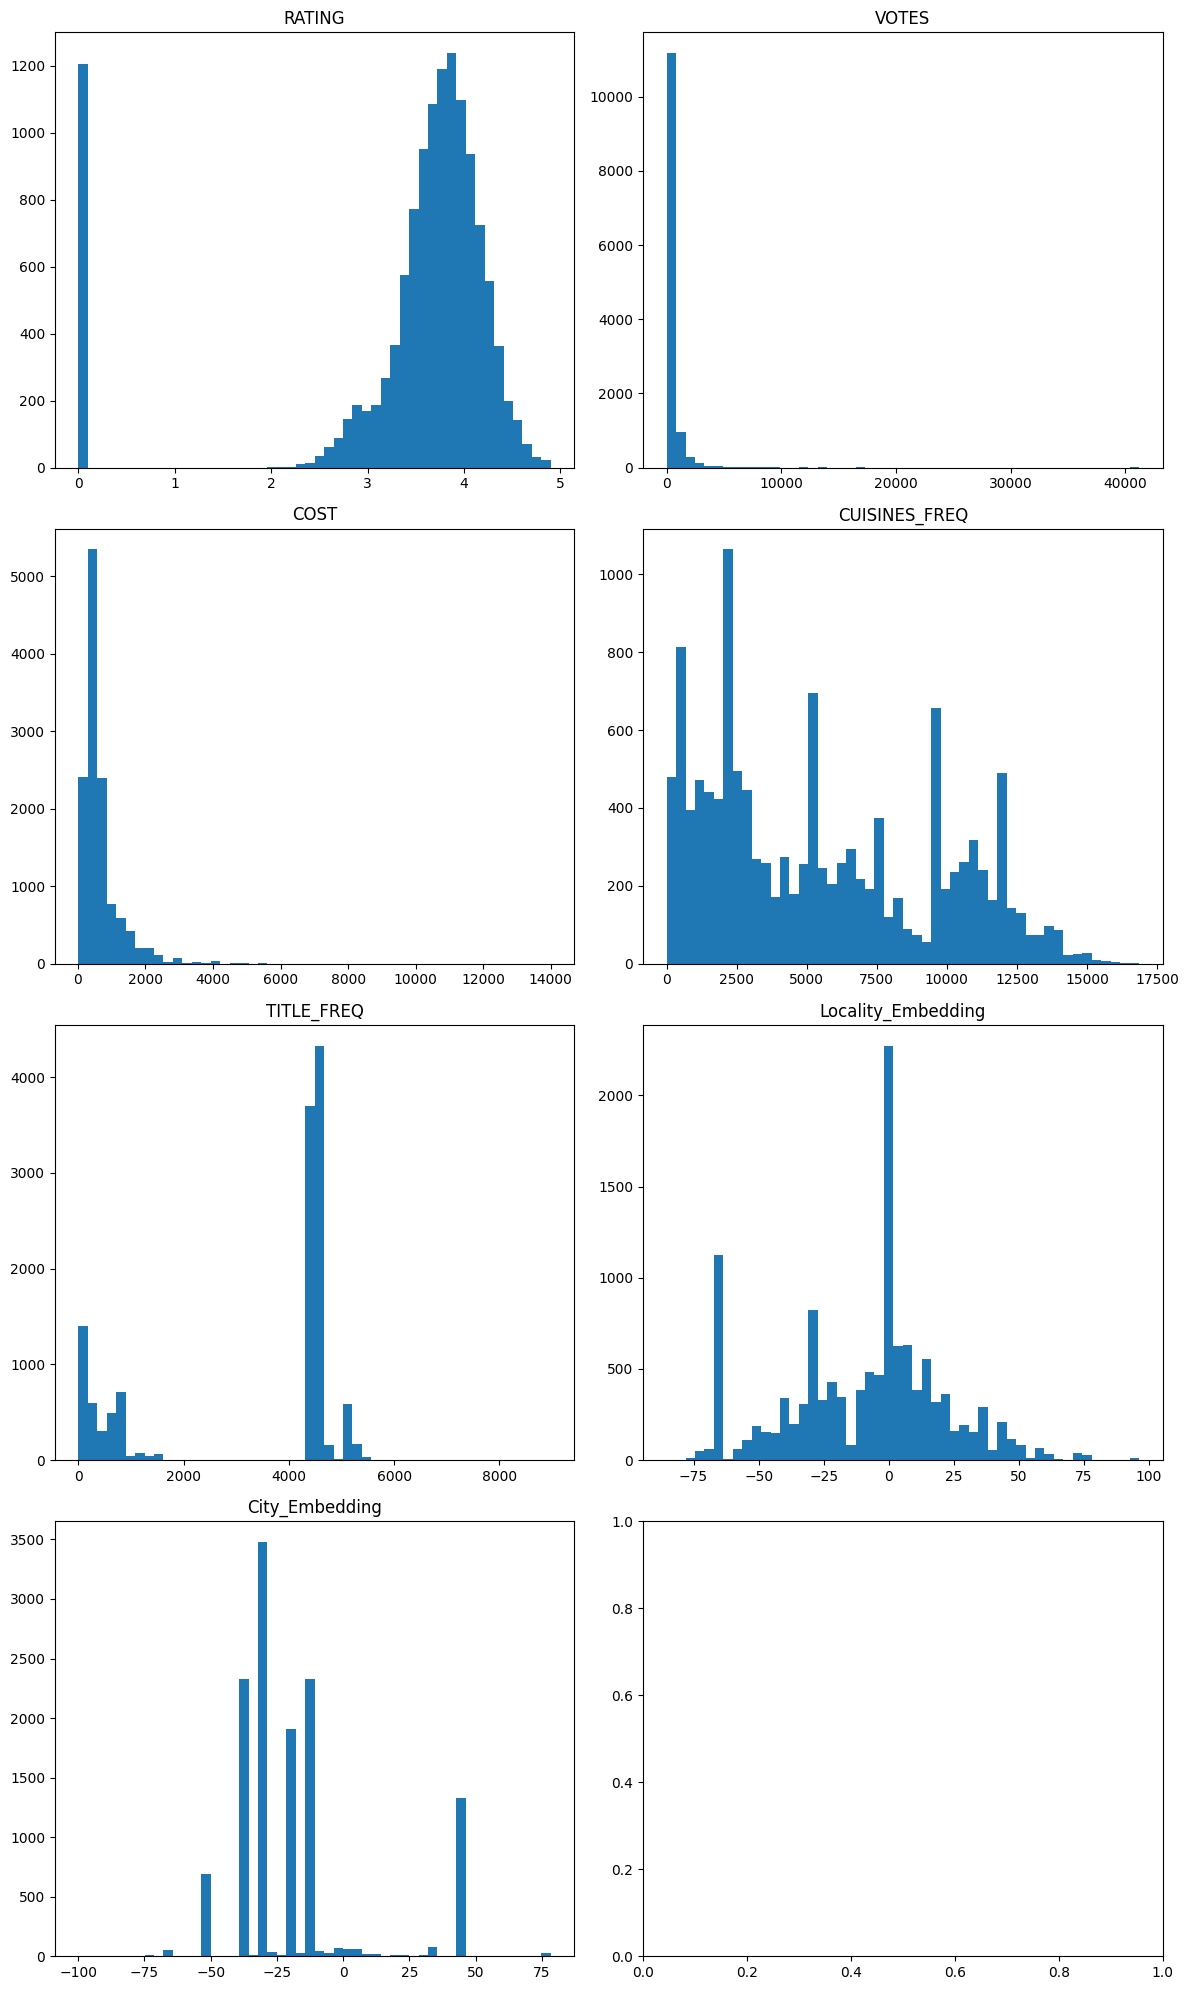

In [177]:
num_histograms = 7
num_cols = 2
num_rows = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(df.columns[:num_histograms]):
    axes[i].hist(df[col], bins=50)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Outliers Detection

We can clearly notice distinct outliers in the data.

Scaling is sentive towards outliers and in such extreme case it will be severely affected.

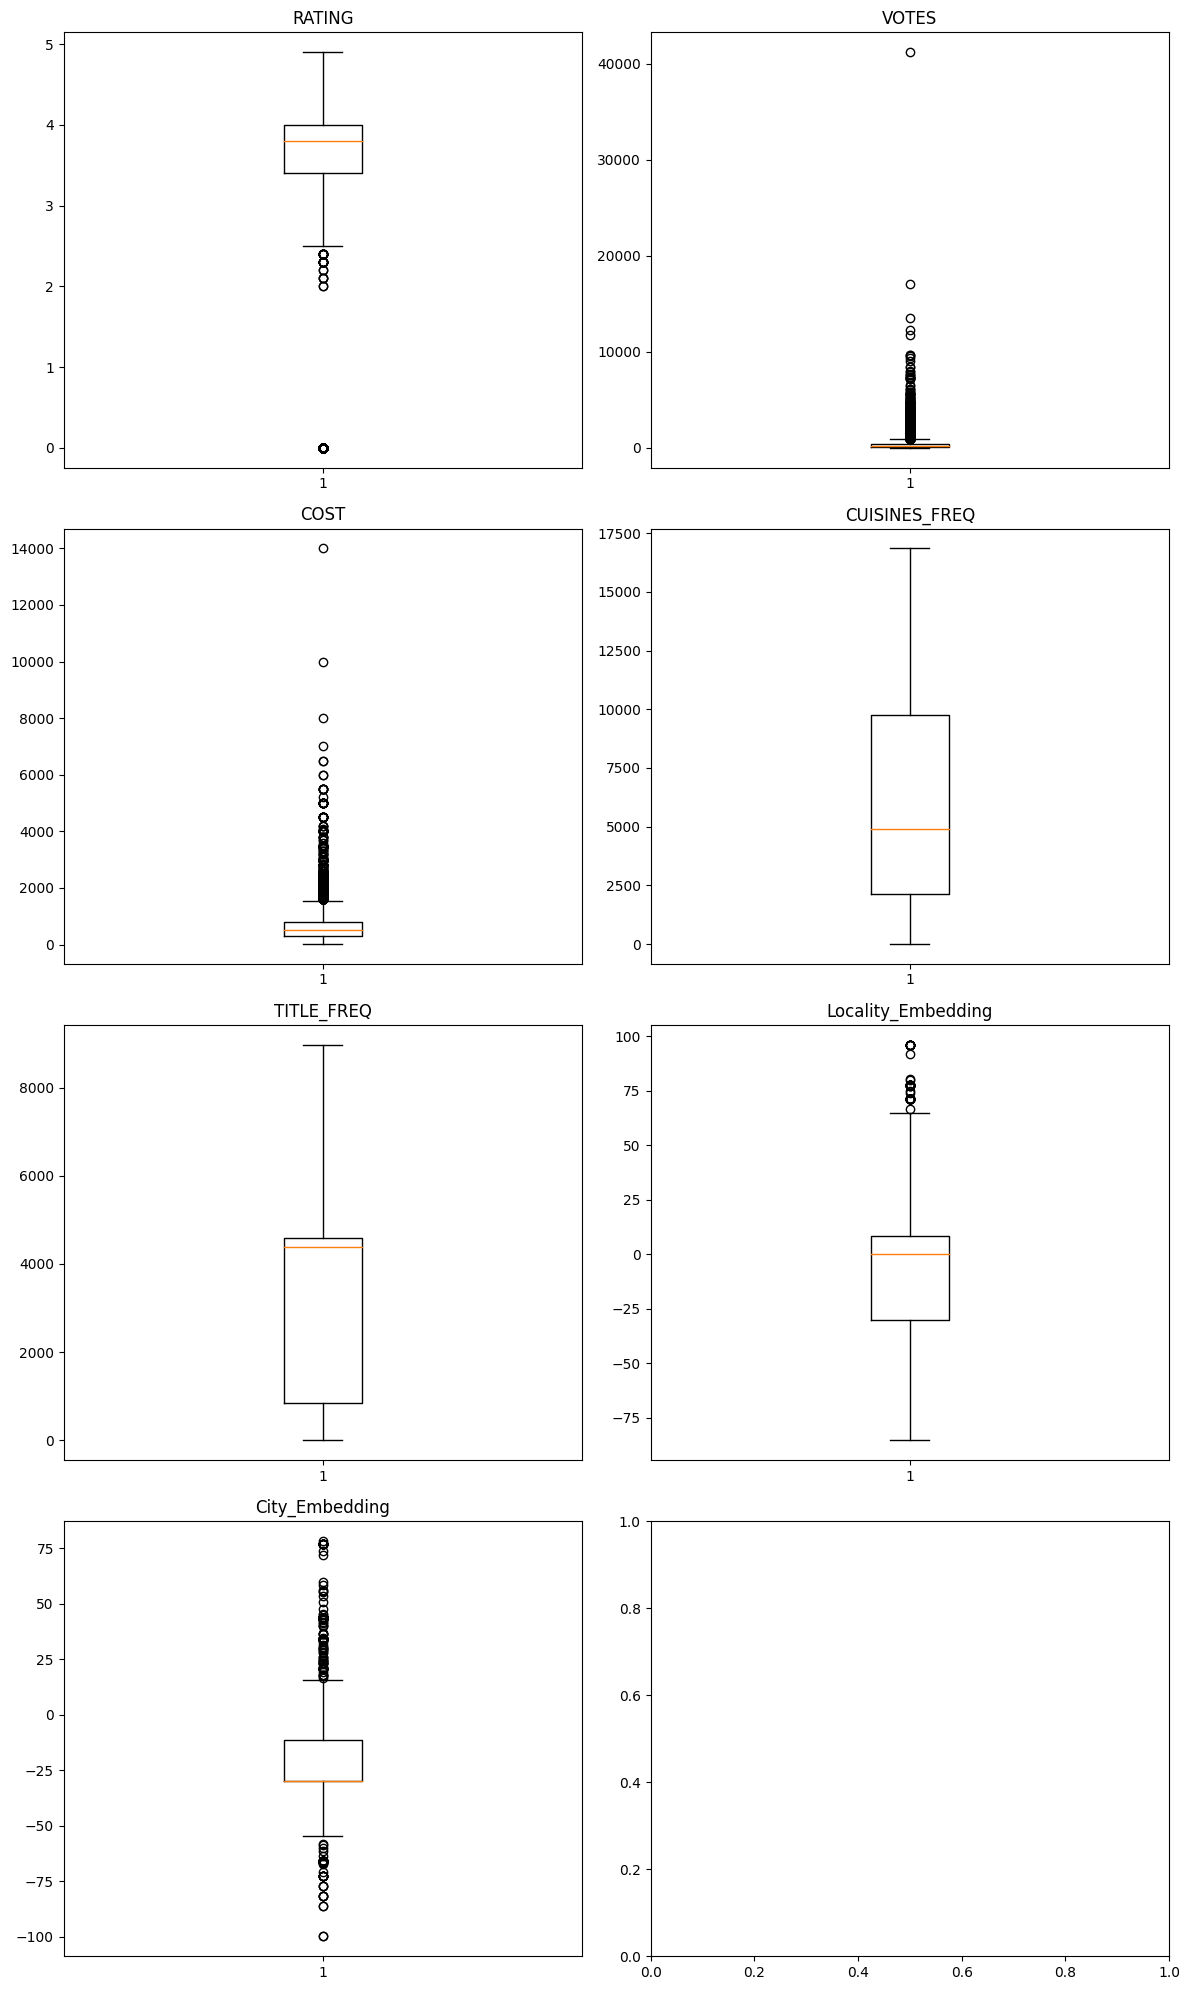

In [179]:
num_histograms = 7
num_cols = 2
num_rows = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(df.columns[:num_histograms]):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Bivariate Analysis

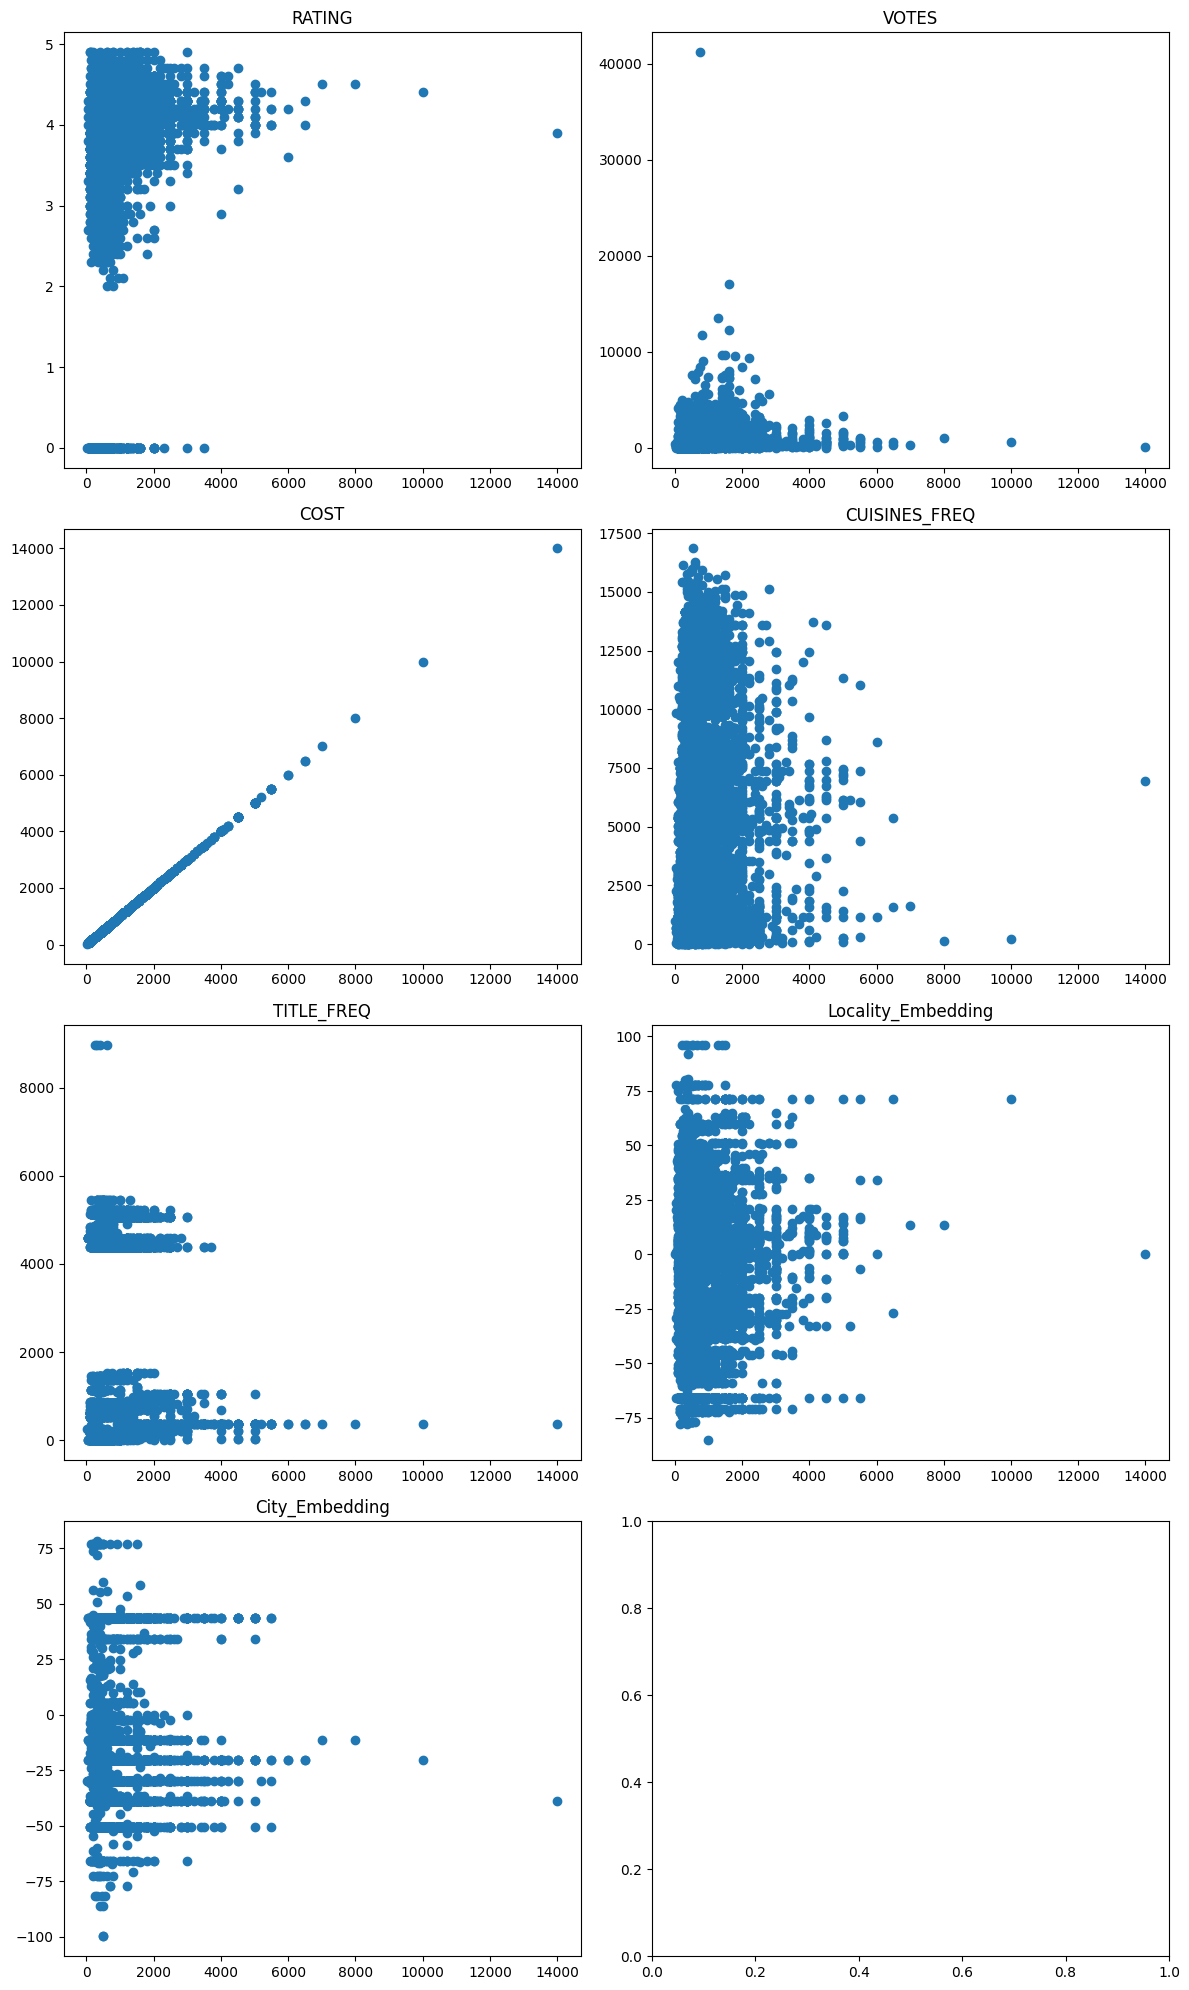

In [233]:
num_histograms = 7
num_cols = 2
num_rows = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(df.columns[:num_histograms]):
    axes[i].scatter(df['COST'], df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Getting rid of outliers

If we use the math to get rid of the outliers we will be losing a significant amount of data, in this case over 1300 instances.

Instead looking at the boxplots we can get an idea about the extreme outliers and we can get rid of the extreme cases by giving a value.

For Votes

In [184]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers, lower_bound, upper_bound = find_outliers(df, 'VOTES')

In [185]:
lower_bound

-447.5

In [186]:
upper_bound

916.5

In [187]:
outliers

,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ,Locality_Embedding,City_Embedding
7,4.3,1612.0,1600,34,71,51.183366,-50.524224
15,4.5,2499.0,1400,159,4382,10.507986,-11.532816
21,4.0,1327.0,500,6016,4598,-21.217494,43.721704
22,4.0,1191.0,450,8515,0,-7.102245,43.721704
29,4.2,2456.0,1400,7664,138,16.862048,-38.765337
...,...,...,...,...,...,...,...
12628,4.6,4876.0,1500,12721,201,6.717297,-38.765337
12655,4.2,2132.0,2000,1450,4517,6.293677,-20.249166
12675,4.5,2723.0,900,704,4379,-8.262412,34.237714
12683,4.1,1426.0,500,8509,4753,-66.014843,43.721704


By setting the value to 10000, we are getting rid of only the extreme values and retaining most of the important data.

In [224]:
data_wo_out_vc = df[df['VOTES'] <= 10000]

In [225]:
data_wo_out_vc

,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ,Locality_Embedding,City_Embedding
0,3.6,49.0,1200,5469,4379,42.694129,-50.524224
1,4.2,30.0,1500,649,5061,-29.948288,-29.948288
2,3.8,221.0,800,11151,4379,0.000000,-29.948288
3,4.1,24.0,800,4419,4598,34.237714,-20.249166
4,3.8,165.0,300,1146,616,6.293677,-20.249166
...,...,...,...,...,...,...,...
12685,3.8,546.0,500,5980,4598,36.567560,-11.532816
12686,4.3,1214.0,1800,1596,5061,8.589271,-20.249166
12687,4.0,608.0,1300,6649,201,-3.382555,-20.249166
12688,3.5,32.0,400,12688,4379,0.000000,-29.948288


For Cost

In [226]:
outliers, lower_bound, upper_bound = find_outliers(df, 'COST')

In [227]:
outliers

,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ,Locality_Embedding,City_Embedding
7,4.3,1612.0,1600,34,71,51.183366,-50.524224
46,4.0,443.0,2000,9781,358,-70.788889,-11.532816
68,3.3,4.0,2500,516,4379,1.083614,-29.948288
72,4.3,380.0,1800,6144,4379,9.225251,-20.249166
84,4.0,416.0,3500,5268,358,51.183366,-50.524224
...,...,...,...,...,...,...,...
12650,4.2,591.0,2500,9479,358,-29.948288,-29.948288
12655,4.2,2132.0,2000,1450,4517,6.293677,-20.249166
12659,4.2,352.0,1800,7254,5061,21.433331,-50.524224
12668,3.5,32.0,2600,13596,358,50.625365,-29.948288


In [228]:
lower_bound

-450.0

In [229]:
upper_bound

1550.0

In this setting the value to 5000 will only cost us 25 instances and we will get rid of the extreme values.That is not that bad, whereas setting the value as per the math will cost us 867 values.

In [230]:
data_wo_out_vc = data_wo_out_vc[data_wo_out_vc['COST'] <=5000]

In [231]:
data_wo_out_vc

,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ,Locality_Embedding,City_Embedding
0,3.6,49.0,1200,5469,4379,42.694129,-50.524224
1,4.2,30.0,1500,649,5061,-29.948288,-29.948288
2,3.8,221.0,800,11151,4379,0.000000,-29.948288
3,4.1,24.0,800,4419,4598,34.237714,-20.249166
4,3.8,165.0,300,1146,616,6.293677,-20.249166
...,...,...,...,...,...,...,...
12685,3.8,546.0,500,5980,4598,36.567560,-11.532816
12686,4.3,1214.0,1800,1596,5061,8.589271,-20.249166
12687,4.0,608.0,1300,6649,201,-3.382555,-20.249166
12688,3.5,32.0,400,12688,4379,0.000000,-29.948288


We won't be touching the Rating column because it from the plots we can see that there are significant number of rating which are equal to 0.

These 0 can be considered as outliers by some people but they are not outliers.

## Correlation Matrix

In [261]:
data_wo_out_vc.corr()

,RATING,VOTES,COST,CUISINES_FREQ,TITLE_FREQ,Locality_Embedding,City_Embedding
RATING,1.000000,0.093932,0.240975,0.056358,-0.033031,0.027801,0.064265
VOTES,0.093932,1.000000,0.348734,0.099502,0.029438,0.016968,0.125592
COST,0.240975,0.348734,1.000000,0.110138,-0.117401,0.059444,0.061529
CUISINES_FREQ,0.056358,0.099502,0.110138,1.000000,0.245805,0.005132,0.006969
TITLE_FREQ,-0.033031,0.029438,-0.117401,0.245805,1.000000,-0.003579,-0.049316
Locality_Embedding,0.027801,0.016968,0.059444,0.005132,-0.003579,1.000000,-0.038617
City_Embedding,0.064265,0.125592,0.061529,0.006969,-0.049316,-0.038617,1.000000


Text(0, 0.5, 'COST')

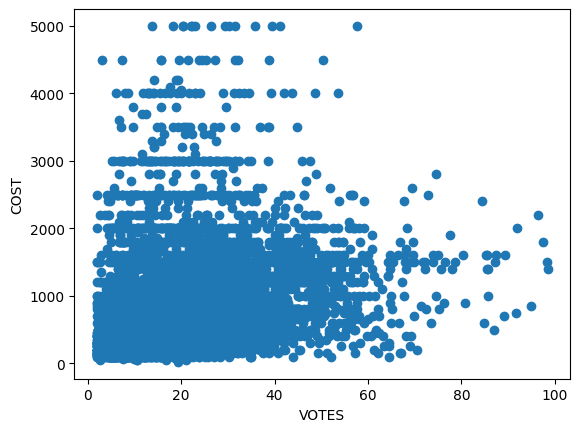

In [299]:
plt.scatter(data_wo_out_vc['VOTES'],data_wo_out_vc['COST'])
plt.xlabel('VOTES')
plt.ylabel('COST')

## Skewness

Let us reduce the skewness of the VOTES column. Other seem to be ok.

In [234]:
data_wo_out_vc.skew()

RATING               -2.213061
VOTES                 5.077886
COST                  2.841308
CUISINES_FREQ         0.454754
TITLE_FREQ           -0.913589
Locality_Embedding   -0.178310
City_Embedding        1.480433
dtype: float64

In [238]:
data_wo_out_vc['VOTES'] = np.power(data_wo_out_vc['VOTES'], 1/2)
df_test['VOTES'] = np.power(df_test['VOTES'], 1/2)

<ipython-input-238-c722fd6fbd3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wo_out_vc['VOTES'] = np.power(data_wo_out_vc['VOTES'], 1/2)


In [239]:
data_wo_out_vc.skew()

RATING               -2.213061
VOTES                 1.813734
COST                  2.841308
CUISINES_FREQ         0.454754
TITLE_FREQ           -0.913589
Locality_Embedding   -0.178310
City_Embedding        1.480433
dtype: float64

## Splitting the data into X_train, y_train, X_val and y_val

Why validation set ?
To see the accuracy of our model before we deploy it on the test set for prediction.

Once we have figure out the right model for prediction, we will train our model with the complete dataset i.e X and y.

In [320]:
X = data_wo_out_vc.drop(['COST'],axis=1)
y = data_wo_out_vc['COST']

In [321]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling the data

In [322]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [323]:
X_train.shape

(10136, 6)

In [324]:
X_val.shape

(2534, 6)

In [325]:
y_train.shape

(10136,)

In [326]:
y_val.shape

(2534,)

## PCA

In [311]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

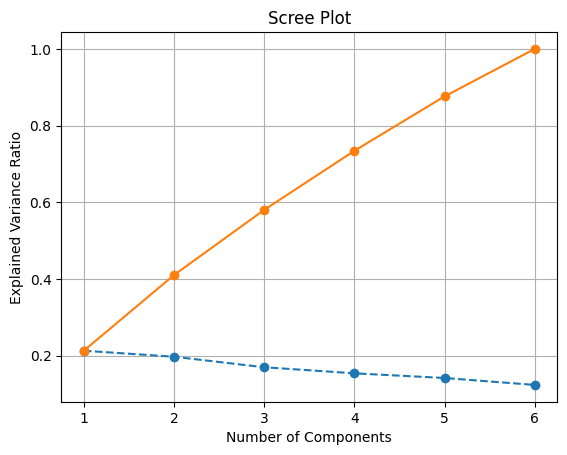

In [312]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [313]:
pca.explained_variance_ratio_

array([0.21301316, 0.19732946, 0.16988594, 0.1540864 , 0.14186672,
       0.12381832])

## Models

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 322.1377279277638
Mean Squared Error: 258207.4327960767
Root Mean Squared Error: 508.14115440109424
R-squared: 0.19933679849346686


In [328]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_val)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_poly_pred = poly_reg.predict(X_poly_test)

mae = mean_absolute_error(y_val, y_poly_pred)
mse = mean_squared_error(y_val, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 314.5940730244731
Mean Squared Error: 249911.94963990324
Root Mean Squared Error: 499.91194188567175
R-squared: 0.19933679849346686


In [329]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)

y_pred = sgd_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 324.3773118415798
Mean Squared Error: 264394.2865562494
Root Mean Squared Error: 514.1928495771303
R-squared: 0.18015227663353728


In [330]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 4, random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 262.0149112517646
Mean Squared Error: 178981.82469607788
Root Mean Squared Error: 423.06243593124395
R-squared: 0.4450037350945685


In [331]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 500, max_depth = 100,
                            min_samples_split = 2, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 200.90637468555428
Mean Squared Error: 111016.83245312923
Root Mean Squared Error: 333.1918853350562
R-squared: 0.655753161206491


In [332]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate = 0.1, random_state=42)
gbrt.fit(X_train, y_train)

y_pred = gbrt.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 227.9293241500112
Mean Squared Error: 127005.65201517146
Root Mean Squared Error: 356.3785235043934
R-squared: 0.6061741877422944


## Conclusion

Our best model in this case is the Random Forest regressor.
We will use this model to train our complete data predict the test set.

## Scaling the complete data

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_com = scaler.fit_transform(X)
y_train_com = y
X_test = scaler.transform(df_test)

In [340]:
X_train_com.shape

(12670, 6)

In [341]:
y_train_com.shape

(12670,)

In [342]:
X_test.shape

(4231, 6)

## Random Forest for the complete data

In [343]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 500, max_depth = 100,
                            min_samples_split = 2, random_state=42)
rfr.fit(X_train_com, y_train_com)

y_pred = rfr.predict(X_test)

In [344]:
df = pd.DataFrame(y_pred, columns=['COST'])

df.to_csv('Cost_output.csv', index=True)

In [345]:
df

,COST
0,1089.400000
1,458.300000
2,680.200000
3,971.000000
4,276.820000
...,...
4226,772.300000
4227,579.800000
4228,420.700000
4229,312.171413
